In [1]:
## MP 573 Lecture 21: Moments of distributions
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal
import pywt as wt
from skimage.data import shepp_logan_phantom
import scipy.stats as stats

font = {'weight' : 'normal',
        'size'   : 18}

np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)


<style>
td {
  font-size: 50px
}
</style>

## Expectation of a function of a random variable

Let us consider a random variable $X$ and some function $g(X)$. If $X$ is a discrete random variable, we define the expectation of $g(X)$, i.e., $E[g(X)]$, as follows


$$    E[g(X)] = \sum_k g(x_k) P(X=x_k) $$

Similarly, if $X$ is a continuous random variable, we define $E[g(X)]$ as follows:

$$    E[g(X)] = \int_{-\infty}^{\infty} g(x) f_X(x) dx $$

Note that the expectation of this function of a random variable gives us an idea of the average value that $g(X)$ will take. 

## Definition of moments: raw moments

The nth raw moment of a random variable $X$ is defined as $E(X^n)$, for $n=1,2, \ldots$. The first moment of a random variable $X$ is called the mean, and is often represented by the symbol $\mu_X$:

$$\mu_X = E(X)$$

For example, for a standard uniform distribution between $a=0$ and $b=1$, the mean is $\mu_X = 0.5$. 

Similarly, we can compute higher raw moments that give us additional information about the random variable. However, rather than using these raw moments directly, we often use a slightly modified version called central moments (or moments about the mean), which we describe next. 

## Definition of moments: central moments

The nth central moment (or moment about the mean) of a random variable $X$ is defined as $E[(X-\mu_X)^n]$, for $n=1,2, \ldots$. Note that the first central moment ($n=1$) is equal to zero by definition, but higher central moments provide very helpful information about a random variable. 

The second central moment is called the variance, and is often written as $\sigma_X^2$ or var$(X)$:

$$    \sigma_X^2 = E[(X-\mu_X)^2]$$

where the value of $\sigma_X$ (without the square) corresponds to the standard deviation of our random variable. The variance $\sigma_X^2$ provides information about the spread of the probability distribution, i.e., the uncertainty in the value of a measurement that is described by our random variable. 

## Discrete distributions: Mean and Variance




|Name | Parameter(s) | PMF ($P(X=x)$)  <img width=300/>         | Mean | Variance <img width=100/> |
| --- | --- | ------------------------------------ | --- | --- |
| Bernoulli | $p$ | $ \left\{ \begin{array}{ll} 1-p, & \hbox{for } x=0 \\  p, & \hbox{for } x=1   \end{array} \right. $ | $p$ | $p(1-p)$  |
|Binomial | $p, n$ | $\frac{n!}{x!(n-x)!} p^x (1-p)^{n-x}, \hbox{ for } x=0,1,\ldots,n$ | $np$ | $np(1-p)$ |
|Poisson | $\mu$ | $e^{-\mu} \frac{\mu^x}{x!}, \hbox{ for } x=0,1,2\ldots$ | $\mu$ | $\mu$ |



## Bernoulli

The PMF of a Bernoulli distributed random variable is:

$$P(X=x)  =  \left\{ \begin{array}{ll} 1-p, & \hbox{for } x=0 \\  p, & \hbox{for } x=1  \\  0, &  \hbox{else } \end{array}  \right.$$

The Bernoulli distribution can be used to describe the outcome of a single trial, such as the flip of a single coin (with $p$ being the probability of obtaining heads), or the number of points obtained when shooting a single free-throw in basketball (with $p$ being the probability of scoring).

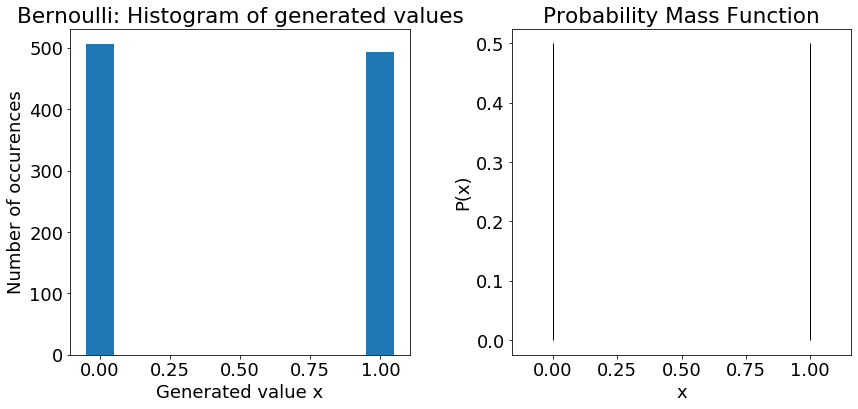

Sample mean =       0.494
Distribution mean = 0.5

Sample variance =       0.24996399999999994
Distribution variance = 0.25


In [2]:
# Distribution parameters
p = 0.5;

# Number of trials
N = 1000;

# Generate and show some data
rv_bernoulli = stats.bernoulli(p)
r = stats.bernoulli.rvs(p, size=N)
fig = plt.figure(figsize=(14,6))
fig.subplots_adjust(hspace=0.3,wspace=0.3)
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.title('Bernoulli: Histogram of generated values')
_ = plt.hist(r, bins=np.arange(-0.05,1.15,0.1))
plt.xlabel('Generated value x');
plt.ylabel('Number of occurences');


# Show the pmf
# mean, var, skew, kurt = stats.bernoulli.stats(p, moments='mvsk')
plt.subplot(1,2,2)
plt.title('Probability Mass Function')
x = np.arange(-0.1,1.1,0.1)
plt.vlines(x, 0, rv_bernoulli.pmf(x), colors='k', linestyles='-', lw=1,label='Bernoulli pmf')
#plt.legend(loc='upper center', frameon=False)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

# Calculate distribution mean and variance
mean, var = stats.bernoulli.stats(p, moments='mv')

# Calculate sample mean and variance
smean = np.mean(r)
svar = np.var(r)


print('Sample mean =       ' + str(smean))
print('Distribution mean = ' + str(mean) + '\n')


print('Sample variance =       ' + str(svar))
print('Distribution variance = ' + str(var))





## Binomial

The PMF of a binomial distributed random variable is:

$$P(X=x) = \frac{n!}{x!(n-x)!} p^x (1-p)^{n-x}, \hbox{ for } x=0,1,\ldots,n$$

The binomial distribution can be seen as an extension of the Bernoulli distribution to the case with multiple trials. Indeed, the binomial PMF describes the probability of obtaining a certain outcome in exactly $x$ trials out of $n$ attempts, where the probability of obtaining such outcome in an individual trial is $p \in [0,1]$ (note that $p$ is the same for each of the trials), and the trials are independent (i.e., the outcome of one trial does not depend on the outcomes of the remaining $n-1$ trials). 

For example, suppose a basketball player takes $n=10$ free throws. Let us assume that this player has a probability $p=0.8$ of making each individual free-throw regardless of what happens with the other attempts. What is the probability that this player will make exactly $6$ free-throws from their 10 attempts? What is the probability that they will make $8$ or more?

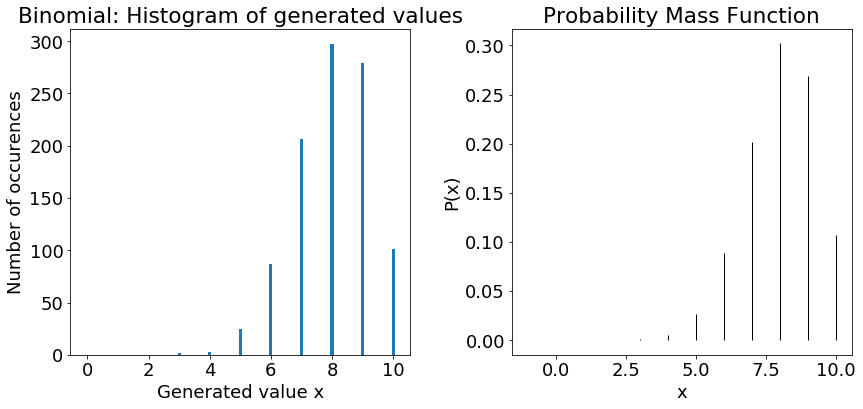

Sample mean =       8.004
Distribution mean = 8.0

Sample variance =       1.5599839999999998
Distribution variance = 1.5999999999999996


In [3]:
# Distribution parameters
p = 0.8;
n = 10;

# Number of trials
N = 1000;

# Generate and show some data
r = stats.binom.rvs(n, p, size=N)
fig = plt.figure(figsize=(14,6))
fig.subplots_adjust(hspace=0.3,wspace=0.3)
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.title('Binomial: Histogram of generated values')
_ = plt.hist(r, bins=np.arange(-0.05,n + 0.15,0.1))
plt.xlabel('Generated value x');
plt.ylabel('Number of occurences');


# Show the pmf
# mean, var, skew, kurt = stats.bernoulli.stats(p, moments='mvsk')
plt.subplot(1,2,2)
plt.title('Probability Mass Function')
x = np.round(np.arange(-1,n+1,1))
plt.vlines(x, 0, stats.binom.pmf(x,n,p), colors='k', linestyles='-', lw=1,label='Binomial pmf')
#plt.legend(loc='upper center', frameon=False)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()


# Calculate distribution mean and variance
mean, var = stats.binom.stats(n,p, moments='mv')

# Calculate sample mean and variance
smean = np.mean(r)
svar = np.var(r)


print('Sample mean =       ' + str(smean))
print('Distribution mean = ' + str(mean) + '\n')


print('Sample variance =       ' + str(svar))
print('Distribution variance = ' + str(var))



## Poisson

The PMF of a Poisson distributed random variable is:

$$P(X=x) = e^{-\mu} \frac{\mu^x}{x!}, \hbox{ for } x=0,1,2\ldots$$

The Poisson distribution can describe the number of unpredictable events that happen over a certain interval. For example, the number of daily visitors to a  webpage, the number of typos in a book, or the number of sales of a particular product, may be modeled as following Poisson distributions. Importantly for biomedical imaging, the noise distribution in certain imaging modalities (e.g., X-rays, computed tomography) can be modeled using a Poisson distribution. 

Suppose we can model the number of events occurring over a small subinterval as independent of the number of events that occur over any other subinterval (e.g., the number of webpage visitors between 1:00PM and 1:15PM is independent of the number of visitors between 1:45pm and 2:00PM, etc), and further the distribution of events in each subinterval only depends on the size (duration) of the interval. If events occur at an average rate of $\lambda$ events per unit time, and we consider a time interval of duration $t$ (for instance, 24 hours for our webpage example), then $\mu = \lambda t$ describes the average number of events occuring over our interval, and the probability of observing a specific number of events $x$ is described by the PMF above. 


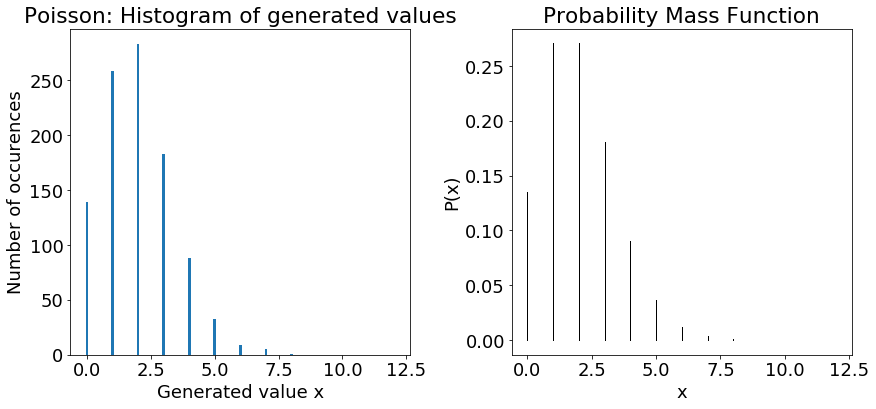

Sample mean =       1.988
Distribution mean = 2.0

Sample variance =       1.951856
Distribution variance = 2.0


In [4]:
# Distribution parameters
mu = 2.0

# Number of trials
N = 1000;

# Generate and show some data
r = stats.poisson.rvs(mu, size=N)
fig = plt.figure(figsize=(14,6))
fig.subplots_adjust(hspace=0.3,wspace=0.3)
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.title('Poisson: Histogram of generated values')
_ = plt.hist(r, bins=np.arange(-0.05,mu*5 + 2.15,0.1))
plt.xlabel('Generated value x');
plt.ylabel('Number of occurences');


# Show the pmf
# mean, var, skew, kurt = stats.bernoulli.stats(p, moments='mvsk')
plt.subplot(1,2,2)
plt.title('Probability Mass Function')
x = np.round(np.arange(-0.05,mu*5 + 2.15,0.1))
plt.vlines(x, 0, stats.poisson.pmf(x,mu), colors='k', linestyles='-', lw=1)
#plt.legend(loc='upper center', frameon=False)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

# Calculate distribution mean and variance
mean, var = stats.poisson.stats(mu, moments='mv')

# Calculate sample mean and variance
smean = np.mean(r)
svar = np.var(r)


print('Sample mean =       ' + str(smean))
print('Distribution mean = ' + str(mean) + '\n')


print('Sample variance =       ' + str(svar))
print('Distribution variance = ' + str(var))



## Uniform

In our example above with the internet provider, the arrival time was modeled as following a uniform distribution, where the probability density is constant over a certain interval, and zero elsewhere. In general, the PDF of a uniform distribution between some minimum value $a$ and some maximum value $b$ is given by:

$$f_X(x)  =  \left\{ \begin{array}{ll} \frac{1}{b-a}, & \hbox{for } a \leq x \leq b \\  0, & \hbox{else } \end{array}  \right.$$

A particular case of the uniform distribution that is often used in computational software is the case where $a=0$ and $b=1$.

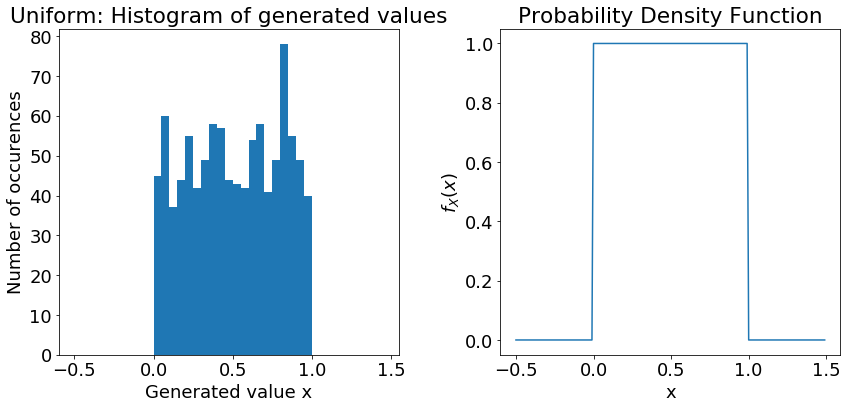

Sample mean =       0.5086174089698428
Distribution mean = 0.5

Sample variance =       0.08225417548187042
Distribution variance = 0.08333333333333333


In [5]:
# Distribution parameters
a = 0
b = 1

# Number of trials
N = 1000;

# Generate and show some data
r = stats.uniform.rvs(a, b-a, size=N)
fig = plt.figure(figsize=(14,6))
fig.subplots_adjust(hspace=0.5,wspace=0.3)
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.title('Uniform: Histogram of generated values')
_ = plt.hist(r, bins=np.arange(a-0.5,b+0.5,0.05))
plt.xlabel('Generated value x');
plt.ylabel('Number of occurences');


# Show the pmf
# mean, var, skew, kurt = stats.bernoulli.stats(p, moments='mvsk')
plt.subplot(1,2,2)
plt.title('Probability Density Function')
x = np.arange(a-0.5,b+0.5,0.01)
plt.plot(x, stats.uniform.pdf(x,a,b-a))
#plt.legend(loc='upper center', frameon=False)
plt.xlabel('x')
plt.ylabel('$f_X(x)$')
plt.show()

# Calculate distribution mean and variance
mean, var = stats.uniform.stats(a,b-a, moments='mv')

# Calculate sample mean and variance
smean = np.mean(r)
svar = np.var(r)


print('Sample mean =       ' + str(smean))
print('Distribution mean = ' + str(mean) + '\n')


print('Sample variance =       ' + str(svar))
print('Distribution variance = ' + str(var))



## Exponential

The exponential distribution has the following PDF:

$$f_X(x)  =  \lambda e^{-\lambda x}, \hbox{ for } x \geq 0 (  f_X(x)=0 \hbox{ for } x<0)$$ 

and is determined by a single parameter, $\lambda$. 

For example, this distribution describes the time between consecutive events in a Poisson process. As mentioned above, the parameter $\lambda$ can be viewed as the average rate of events per unit time.  

The exponential distribution is a particular case of the more general gamma distribution. 



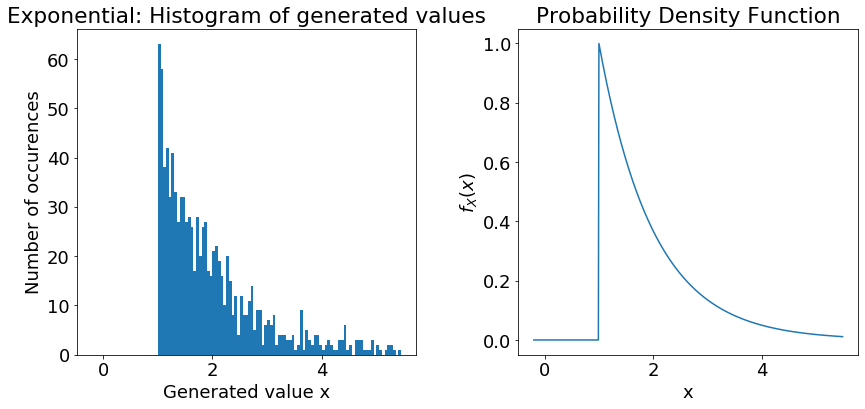

Sample mean =       2.0126172214105122
Distribution mean = 2.0

Sample variance =       1.126506052472981
Distribution variance = 1.0


In [6]:
# Distribution parameters
offset = 0 # Assumed in the description above
lam = 1

# Number of trials
N = 1000;

# Generate and show some data
r = stats.expon.rvs(offset, lam, size=N)
fig = plt.figure(figsize=(14,6))
fig.subplots_adjust(hspace=0.3,wspace=0.3)
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.title('Exponential: Histogram of generated values')
_ = plt.hist(r, bins=np.arange(-0.2,5*lam+0.5,0.05))
plt.xlabel('Generated value x');
plt.ylabel('Number of occurences');


# Show the pmf
# mean, var, skew, kurt = stats.bernoulli.stats(p, moments='mvsk')
plt.subplot(1,2,2)
plt.title('Probability Density Function')
x = np.arange(-0.2,5*lam+0.5,0.01)
plt.plot(x, stats.expon.pdf(x,lam))
#plt.legend(loc='upper center', frameon=False)
plt.xlabel('x')
plt.ylabel('$f_X(x)$')
plt.show()


# Calculate distribution mean and variance
mean, var = stats.expon.stats(lam, moments='mv')

# Calculate sample mean and variance
smean = np.mean(r)
svar = np.var(r)


print('Sample mean =       ' + str(smean))
print('Distribution mean = ' + str(mean) + '\n')


print('Sample variance =       ' + str(svar))
print('Distribution variance = ' + str(var))



## Gaussian (Normal)

The Gaussian (or Normal) distribution is described by a bell-shaped PDF, as follows:

$$f_X(x)  =  \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2}$$

The Gaussian distribution is essential in science and engineering, because many random variables that we encounter are well approximated as Gaussian (e.g., noise in raw Fourier-space MRI signals). However, not all random variables are well approximated as Gaussian. Therefore, it is important to be mindful of the validity (or lack thereof) of any implicit assumptions of Gaussianity in our probabilistic analyses. 

Note that the Gaussian distribution is described by two parameters: the mean $\mu$, which describes the location of the center of the bell-shape along the x axis, and the standard deviation $\sigma$, which describes the width of the bell-shape. In subsequent lectures, we will describe the moments of random variables, and will define and apply the concepts of mean and standard deviation. 

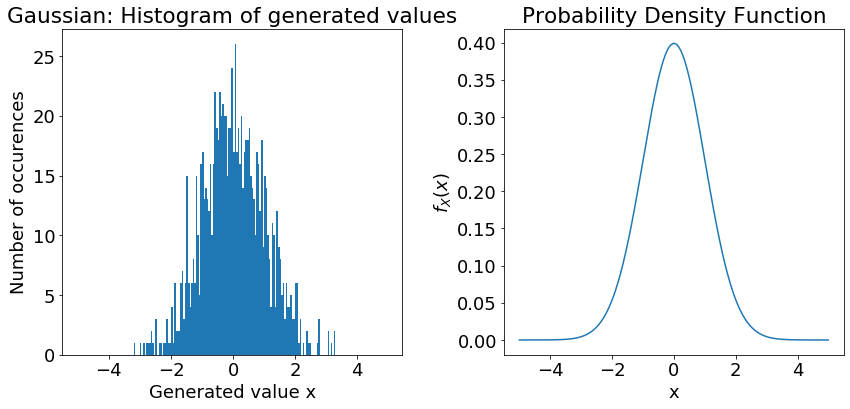

Sample mean =       0.029160898581676708
Distribution mean = 0.0

Sample variance =       1.0512787266563737
Distribution variance = 1.0


In [30]:
# Distribution parameters
mu = 0
sigma = 1

# Number of trials
N = 1000;

# Generate and show some data
r = stats.norm.rvs(mu, sigma, size=N)
fig = plt.figure(figsize=(14,6))
fig.subplots_adjust(hspace=0.5,wspace=0.3)
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.title('Gaussian: Histogram of generated values')
_ = plt.hist(r, bins=np.arange(mu-5*sigma,mu+5*sigma,0.05))
plt.xlabel('Generated value x');
plt.ylabel('Number of occurences');


# Show the pmf
# mean, var, skew, kurt = stats.bernoulli.stats(p, moments='mvsk')
plt.subplot(1,2,2)
plt.title('Probability Density Function')
x = np.arange(mu-5*sigma,mu+5*sigma,0.01)
plt.plot(x, stats.norm.pdf(x,mu,sigma))
#plt.legend(loc='upper center', frameon=False)
plt.xlabel('x')
plt.ylabel('$f_X(x)$')
plt.show()

# Calculate distribution mean and variance
mean, var = stats.norm.stats(mu,sigma, moments='mv')

# Calculate sample mean and variance
smean = np.mean(r)
svar = np.var(r)


print('Sample mean =       ' + str(smean))
print('Distribution mean = ' + str(mean) + '\n')


print('Sample variance =       ' + str(svar))
print('Distribution variance = ' + str(var))

## One more example: sum of multiple non-Gaussian random variables

Number of RVs: 1
Sample mean =       -0.001788049884010955
Sample variance =       0.08380727042425236

Number of RVs: 2
Sample mean =       -0.0014974478838552672
Sample variance =       0.16633004624063846

Number of RVs: 4
Sample mean =       -0.00109217753781772
Sample variance =       0.3329997312837822

Number of RVs: 200
Sample mean =       0.030454337197407366
Sample variance =       16.668902871322565



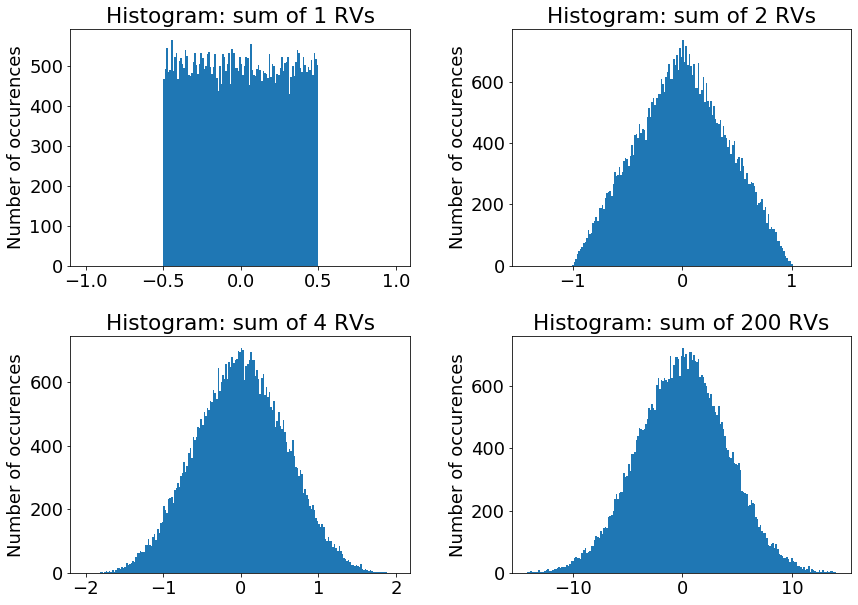

In [34]:
# Uniform example
# Distribution parameters
a = -0.5
b = 0.5

# Number of averages
Ave = [1,2,4,200]

# Number of trials
N = 50000;
fig = plt.figure(figsize=(14,10))
plt.rc('font', **font)
fig.subplots_adjust(hspace=0.3,wspace=0.3)

for k in range(4):
    # Generate and show some data
    r = stats.uniform.rvs(a, b-a, size=[N,Ave[k]])
    r = np.sum(r,axis=1)
    plt.subplot(2,2,k+1)
    plt.title('Histogram: sum of ' + str(Ave[k]) + ' RVs')
    _ = plt.hist(r, bins=np.sqrt(Ave[k])*np.arange(a-0.5,b+0.5,0.01))
    #plt.xlabel('Generated value x');
    plt.ylabel('Number of occurences');
    
    # Calculate sample mean and variance
    smean = np.mean(r)
    svar = np.var(r)
    print('Number of RVs: ' + str(Ave[k]))
    print('Sample mean =       ' + str(smean))
    print('Sample variance =       ' + str(svar) + '\n')
    